In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nomes dos arquivos CSV
arquivos_csv = {
    'Case 2': 'resultados_true_true.csv',
    'Base Case': 'resultados_false_false.csv',
    'Case 1': 'resultados_true_false.csv'
}

# Nomes dos meses em inglês
months_english = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Cor para o gráfico de barras do consumo
bar_color = '#6495ED'  # Cornflower Blue

# Função para plotar o gráfico de barras do consumo CEAMAZON
def plot_ceamazon_consumption_bar_chart(df, file_key, title):
    bar_width = 0.5
    indices = np.arange(len(months_english))
    
    # Dados de consumo do CEAMAZON
    ceamazon_consumption = df['Energia Carga Ceamazon'] + df['Energia Perdas'] #+ df['Energia Entrada Ceamazon']

    plt.figure(figsize=(10,6))
    plt.bar(indices, ceamazon_consumption, color=bar_color, width=bar_width, label='CEAMAZON Consumption')

    plt.xlabel('Months', fontweight='bold')
    plt.xticks(indices, months_english, rotation=45)
    plt.ylabel('Energy (kWh)')
    plt.title(f'{title} - {file_key.replace("_", " ").capitalize()}')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'{file_key}_ceamazon_consumption.svg', format='svg')
    plt.close()

# Processando cada arquivo CSV
for key, filename in arquivos_csv.items():
    df = pd.read_csv(filename)
    plot_ceamazon_consumption_bar_chart(df, key, 'Monthly CEAMAZON Consumption')


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nomes dos arquivos CSV
arquivos_csv = {
    'Case 2': 'resultados_true_true.csv',
    'Base Case': 'resultados_false_false.csv',
    'Case 1': 'resultados_true_false.csv'
}

# Nomes dos meses em inglês
months_english = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Cor para o gráfico de barras do consumo
bar_color = 'green'  

# Função para plotar o gráfico de barras do consumo CEAMAZON
def plot_ceamazon_consumption_bar_chart(df, file_key, title):
    bar_width = 0.5
    indices = np.arange(len(months_english))
    
    # Dados de consumo do CEAMAZON
    ceamazon_consumption = abs(df['Energia PV'])

    plt.figure(figsize=(10,6))
    plt.bar(indices, ceamazon_consumption, color=bar_color, width=bar_width, label='CEAMAZON Generation')

    plt.xlabel('Months', fontweight='bold')
    plt.xticks(indices, months_english, rotation=45)
    plt.ylabel('Energy (kWh)')
    plt.title(f'{title} - {file_key.replace("_", " ").capitalize()}')
    plt.legend()
 
    plt.tight_layout()
    plt.savefig(f'{file_key}_ceamazon_pv.svg', format='svg')
    plt.close()

# Processando cada arquivo CSV
for key, filename in arquivos_csv.items():
    df = pd.read_csv(filename)
    plot_ceamazon_consumption_bar_chart(df, key, 'Monthly CEAMAZON Generation')

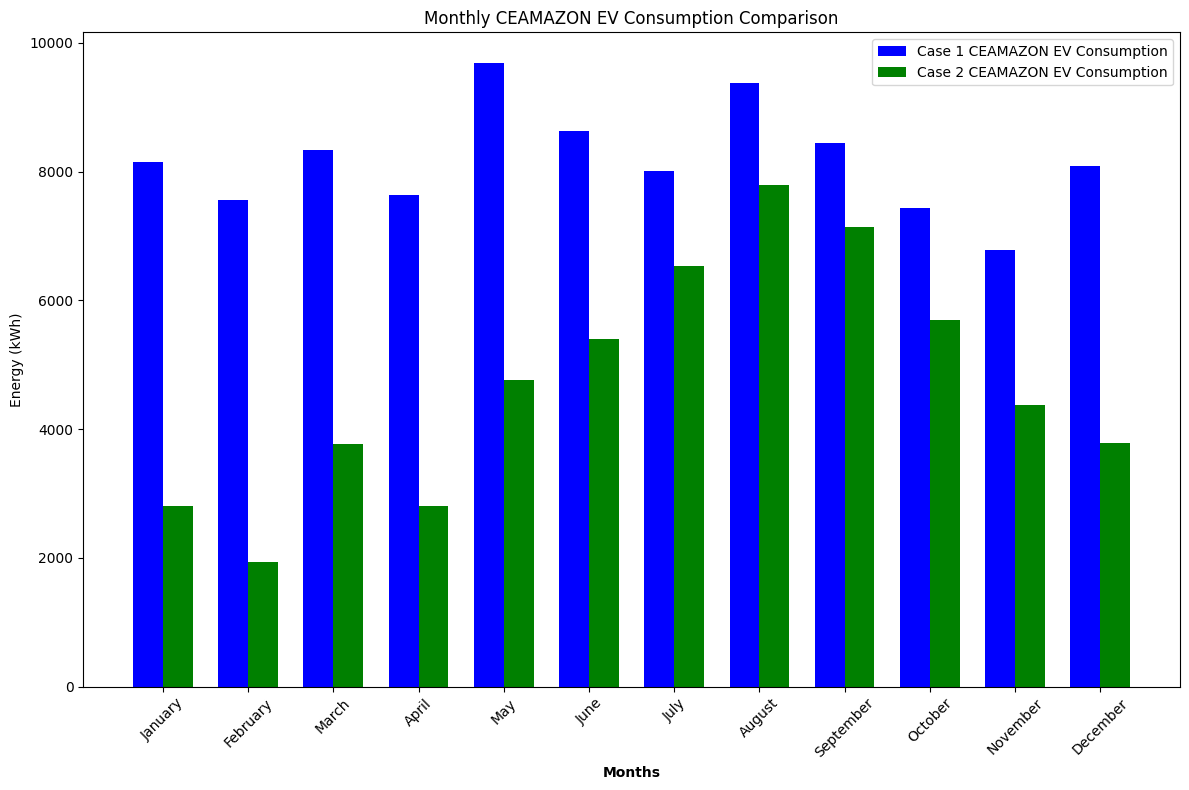

In [36]:
# Código corrigido para plotar os resultados de ambos os CSVs na mesma figura
# Cada mês será representado por duas barras, mostrando abs(df['Energia VE']) para cada caso

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nomes dos arquivos CSV
arquivos_csv = {
    'Case 1': 'resultados_true_false.csv',
    'Case 2': 'resultados_true_true.csv'
}

# Nomes dos meses em inglês
months_english = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Cores para o gráfico de barras
colors = ['blue', 'green']  # Diferentes cores para cada caso

# Função para plotar o gráfico de barras do consumo CEAMAZON
def plot_ceamazon_consumption_comparison(title):
    bar_width = 0.35  # Largura das barras
    indices = np.arange(len(months_english))  # Índices para o posicionamento das barras
    
    plt.figure(figsize=(12, 8))  # Definindo o tamanho da figura
    
    for i, (case_key, filename) in enumerate(arquivos_csv.items()):
        df = pd.read_csv(filename)
        ceamazon_consumption = abs(df['Energia VE'])
        plt.bar(indices + i*bar_width, ceamazon_consumption, color=colors[i], width=bar_width,
                label=f'{case_key} CEAMAZON EV Consumption')

    plt.xlabel('Months', fontweight='bold')
    plt.xticks(indices + bar_width / 2, months_english, rotation=45)
    plt.ylabel('Energy (kWh)')
    plt.title(title)
    plt.legend()
 
    plt.tight_layout()
    plt.savefig('ceamazon_ev_consumption_comparison.svg', format='svg')
    plt.show()
    plt.close()

# Chamada da função para gerar o gráfico
plot_ceamazon_consumption_comparison('Monthly CEAMAZON EV Consumption Comparison')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paths to CSV files
csv_files = {
    'Base Case': 'resultados_false_false.csv',
    'Scenario 1': 'resultados_true_false.csv',
    'Scenario 2': 'resultados_true_true.csv'
}

# English names for the months
months_english = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Colors for the plots
colors = {
    'ceamazon_consumption': '#6495ED',  # Cornflower Blue
    've_consumption': '#FFD700',  # Gold
    'generation': '#7FFFD4',  # Aquamarine
    'percentage_line': '#778899'  # Light Slate Gray
}

# Function to plot the requested chart
def plot_custom_bar_chart(df, file_key, title):
    bar_width = 0.35
    indices = np.arange(len(months_english))

    # Consumption and generation data
    ceamazon_consumption = df['Energia Carga Ceamazon'] + df['Energia Perdas'] #+ df['Energia Entrada Ceamazon']
    ve_consumption = df['Energia VE']
    total_consumption = ceamazon_consumption + ve_consumption
    pv_generation = abs(df['Energia PV'])

    # Calculating the generation/consumption percentage
    percentage = (pv_generation / total_consumption) * 100

    # Make the figure larger for better visibility
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plotting the CEAMAZON consumption bar
    bars1 = ax1.bar(indices, ceamazon_consumption, color=colors['ceamazon_consumption'], width=bar_width, label='CEAMAZON Consumption')
    
    # Adding the VE consumption on top
    bars2 = ax1.bar(indices, ve_consumption, color=colors['ve_consumption'], width=bar_width, bottom=ceamazon_consumption, label='EV Consumption')

    # Plotting the PV generation bar on the right
    bars3 = ax1.bar(indices + bar_width, pv_generation, color=colors['generation'], width=bar_width, label='PV Generation')

    ax1.set_xlabel('Month', fontweight='bold')
    ax1.set_xticks(indices + bar_width / 2)
    ax1.set_xticklabels(months_english, rotation=45)
    ax1.set_ylabel('Energy (kWh)')
    ax1.set_title(f'{title} - {file_key.replace("_", " ").capitalize()}')

    # Sync the y-axis for all subplots
    max_y = max(max(ceamazon_consumption + ve_consumption), max(pv_generation)) * 1.2
    ax1.set_ylim([0, max_y])

    # Creating the second y-axis for the percentage line
    ax2 = ax1.twinx()
    line = ax2.plot(indices + bar_width / 2, percentage, color=colors['percentage_line'], label='Generation/Consumption (%)', marker='o', linewidth=2, linestyle=':')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_ylim([0, max(percentage) * 1.2])

    # Place legends inside the plot on the upper left
    ax1.legend(loc='upper right', fontsize='medium')
    ax2.legend(loc='upper left', fontsize='medium')

    plt.tight_layout()
    plt.savefig(f'{file_key}_con_gen.svg', format='svg')
    plt.close()

# Processing each CSV file
for key, filename in csv_files.items():
    df = pd.read_csv(filename)
    plot_custom_bar_chart(df, key, 'Monthly Energy CEAMAZON')

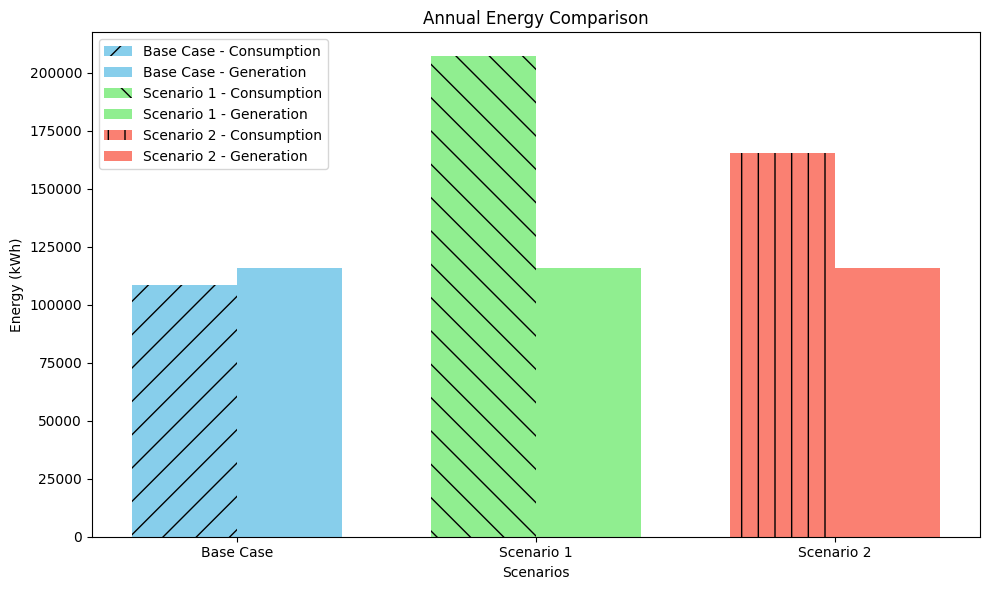

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paths to CSV files
csv_files = {
    'Base Case': 'resultados_false_false.csv',
    'Scenario 1': 'resultados_true_false.csv',
    'Scenario 2': 'resultados_true_true.csv'
}

# Initialize a dictionary to store annual summed data
annual_sums = {'Base Case': {}, 'Scenario 1': {}, 'Scenario 2': {}}

# Read each CSV file and calculate the annual sums for consumption and PV generation
for scenario, csv_file in csv_files.items():
    df = pd.read_csv(csv_file)
    annual_sums[scenario]['Annual Consumption'] = df[['Energia Carga Ceamazon', 'Energia Perdas', 'Energia VE']].sum().sum()
    annual_sums[scenario]['Annual Generation'] = df['Energia PV'].abs().sum()

# Color and bar style configurations
colors = ['skyblue', 'lightgreen', 'salmon']
patterns = ['/', '\\', '|']

# Create the chart
fig, ax = plt.subplots(figsize=(10, 6))

# The width of the bars
bar_width = 0.35
# Set the positions of the bars
index = np.arange(len(csv_files))

# Plot the bars for consumption and PV generation
for i, (scenario, data) in enumerate(annual_sums.items()):
    ax.bar(index[i] - bar_width/2, data['Annual Consumption'], bar_width, label=f'{scenario} - Consumption', color=colors[i], hatch=patterns[i])
    ax.bar(index[i] + bar_width/2, data['Annual Generation'], bar_width, label=f'{scenario} - Generation', color=colors[i])

# Add labels, title and configure the x-axis
ax.set_xlabel('Scenarios')
ax.set_ylabel('Energy (kWh)')
ax.set_title('Annual Energy Comparison')
ax.set_xticks(index)
ax.set_xticklabels(csv_files.keys())
ax.legend()

# Display the chart

plt.tight_layout()
plt.show()

# Save the chart
fig.savefig('annual_energy_comparison.svg', format='svg')




In [21]:
# Corrigindo o código fornecido para usar termos em inglês no gráfico

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Paths to the CSV files
csv_files = {
    'Base Case': 'resultados_tensoes_false_false.csv',
    'Scenario 1': 'resultados_tensoes_true_false.csv',
    'Scenario 2': 'resultados_tensoes_true_true.csv'
}

# Reference voltage range
lower_voltage_ref = 0.95
upper_voltage_ref = 1.05

# Function to plot the voltage curves
def plot_voltage_curves(csv_file, case):
    # Read the data
    df = pd.read_csv(csv_file)

    # Define the days of the year for the x-axis
    days_of_year = np.arange(1, 366)

    # Plot configuration
    plt.figure(figsize=(10, 5))
    plt.plot(days_of_year, df['Maiores Tensões'], label='Higher Voltages', color='green', linewidth=2)
    plt.plot(days_of_year, df['Menores Tensões'], label='Lower Voltages', color='red', linestyle='--', linewidth=2)
    plt.axhline(upper_voltage_ref, color='blue', linestyle='-.', label='1.05 p.u. Reference')
    plt.axhline(lower_voltage_ref, color='blue', linestyle='-.', label='0.95 p.u. Reference')

    # Adding title and labels in English
    plt.title(f'Daily Voltages - {case}')
    plt.xlabel('Day of the Year')
    plt.ylabel('Voltage (p.u.)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the plot as an SVG file
    plt.savefig(f'annual_voltage_{case.replace(" ", "_").lower()}.svg', format='svg')
    plt.close()

# Generate a plot for each case
for case_name, csv_path in csv_files.items():
    plot_voltage_curves(csv_path, case_name)

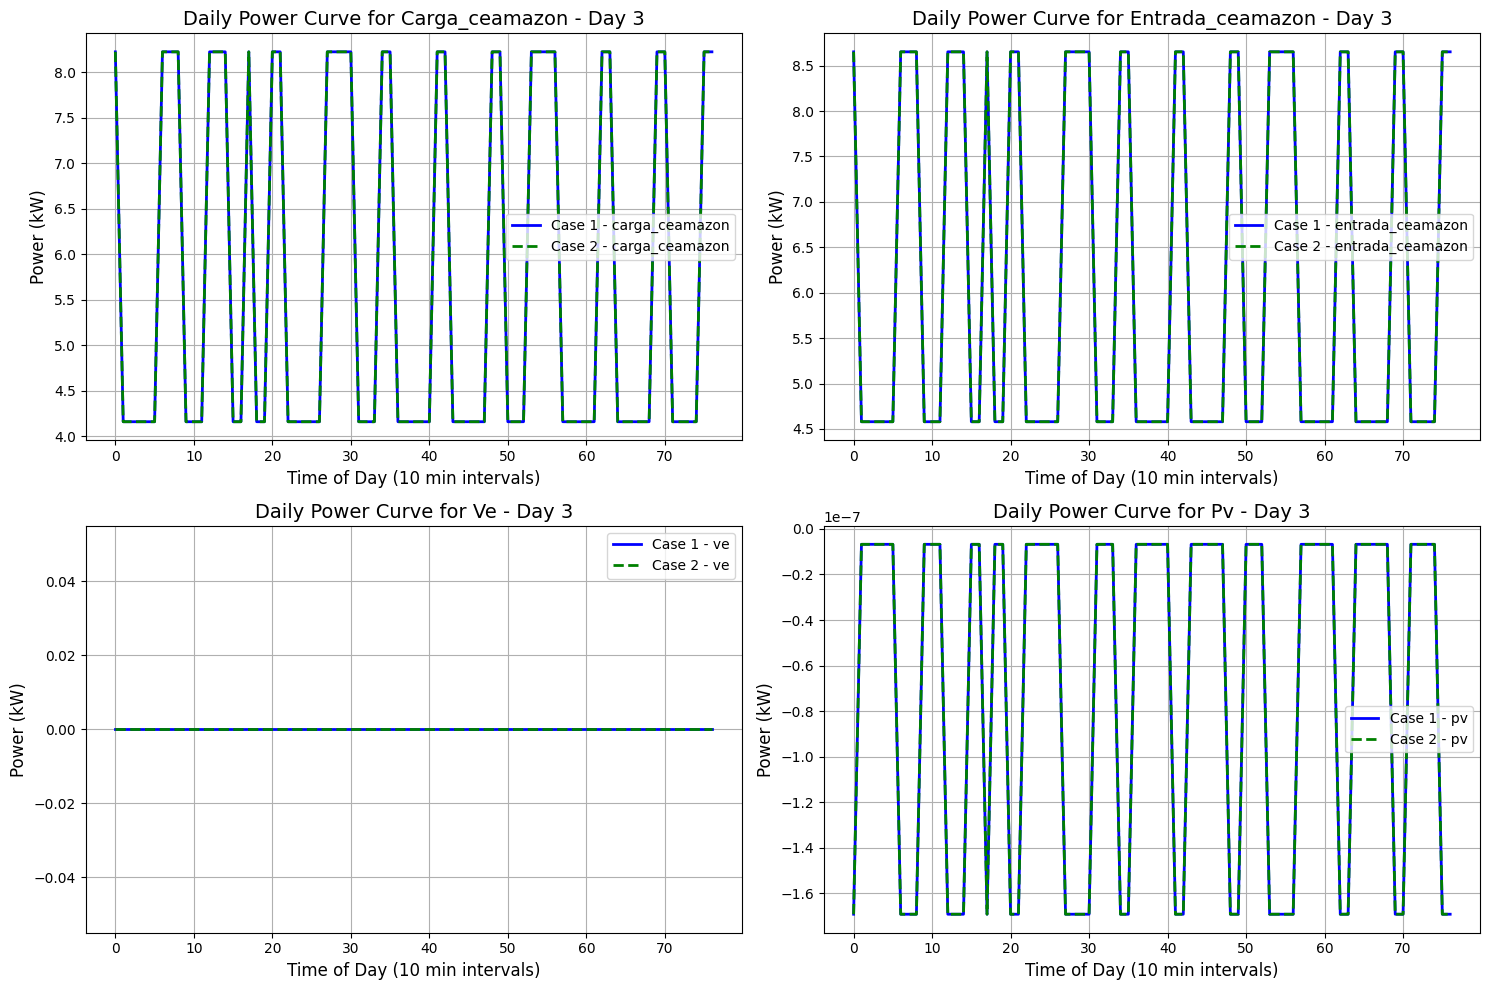

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV para os dois casos
arquivos_csv_caso1 = {
    'carga_ceamazon': 'potencia_ano_carga_ceamazon_true_false.csv',
    'entrada_ceamazon': 'potencia_ano_entrada_ceamazon_true_false.csv',
    've': 'potencia_ano_ve_true_false.csv',
    'pv': 'potencia_ano_pv_true_false.csv'
}

arquivos_csv_caso2 = {
    'carga_ceamazon': 'potencia_ano_carga_ceamazon_true_true.csv',
    'entrada_ceamazon': 'potencia_ano_entrada_ceamazon_true_true.csv',
    've': 'potencia_ano_ve_true_true.csv',
    'pv': 'potencia_ano_pv_true_true.csv'
}

def plot_daily_power_comparison(dia):
    plt.figure(figsize=(15, 10))

    for i, key in enumerate(arquivos_csv_caso1.keys(), 1):
        df_caso1 = pd.read_csv(arquivos_csv_caso1[key])
        df_caso2 = pd.read_csv(arquivos_csv_caso2[key])

        # Seleciona os dados do dia especificado
        data_caso1 = df_caso1.iloc[(dia-1)*144:dia*144, 0]
        data_caso2 = df_caso2.iloc[(dia-1)*144:dia*144, 0]

        plt.subplot(2, 2, i)
        plt.plot(data_caso1.index % 144, data_caso1, label=f'Case 1 - {key}', color='blue', linewidth=2)
        plt.plot(data_caso2.index % 144, data_caso2, label=f'Case 2 - {key}', color='green', linestyle='--', linewidth=2)
        plt.xlabel('Time of Day (10 min intervals)', fontsize=12)
        plt.ylabel('Power (kW)', fontsize=12)
        plt.title(f'Daily Power Curve for {key.capitalize()} - Day {dia}', fontsize=14)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'daily_power_comparison_day{dia}.png')
    plt.show()

# Chamada da função para o dia desejado (por exemplo, dia 3)
plot_daily_power_comparison(3)


In [35]:
# Vou atualizar as funções para se concentrar apenas na variável de interesse ('ve') e adicionar comentários ao script.

import pandas as pd
import matplotlib.pyplot as plt

# Paths to the CSV files for both cases
case1_csv_paths = {
    've': 'potencia_ano_ve_true_false.csv'
}

case2_csv_paths = {
    've': 'potencia_ano_ve_true_true.csv'
}

# Function to plot the daily power comparison for electric vehicles (VE)
def plot_daily_power_comparison_ve(day):
    """
    This function plots the daily power curve for electric vehicles (VE) for the specified day.
    It plots the data for both Case 1 and Case 2 scenarios.
    """
    plt.figure(figsize=(10, 5))

    # Load the data for the specified day
    df_case1 = pd.read_csv(case1_csv_paths['ve'])
    df_case2 = pd.read_csv(case2_csv_paths['ve'])

    # Select the data for the specified day
    data_case1 = df_case1.iloc[(day-1)*144:day*144, 0]
    data_case2 = df_case2.iloc[(day-1)*144:day*144, 0]

    # Plot the curves for each case
    plt.plot(data_case1.index % 144, data_case1, label='Case 1 - VE Power', color='blue', linewidth=2)
    plt.plot(data_case2.index % 144, data_case2, label='Case 2 - VE Power', color='green', linestyle='--', linewidth=2)
    
    # Set the labels and title of the plot
    plt.xlabel('Time of Day (10 min intervals)', fontsize=12)
    plt.ylabel('Power (kW)', fontsize=12)
    plt.title(f'Daily Power Curve for VE - Day {day}', fontsize=14)
    
    # Add the legend and grid
    plt.legend()
    plt.grid(True)
    
    # Set the figure layout to be tight
    plt.tight_layout()
    
    # Save the figure
    plt.savefig(f'daily_power_comparison_ve_day{day}.svg', format='svg')
    plt.close()

# Call the function for the desired day (for example, day 3)
plot_daily_power_comparison_ve(day=365)

In [27]:
df_case_2 = pd.read_csv('potencia_ano_ve_true_true.csv')
df_case_1 = pd.read_csv('potencia_ano_ve_true_false.csv')

In [34]:
df_case_1.value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68     69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86         87         88         89         90         91         92         93         94        95         96         97         98         99         100        101        102        103        104    105        106        107        108        109        110        111        112        113        114        115        116        117        118  

In [33]:
df_case_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
count,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,365.0,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.079635,5.137483,5.153286,5.169048,5.166638,5.166135,5.179973,5.140582,5.095369,2.047262
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.645427,11.778048,11.814279,11.850412,11.844889,11.843734,11.875459,11.785152,11.681499,4.693494
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.864048,46.386358,46.529051,46.671358,46.649605,46.645056,46.770000,46.414338,46.006114,18.484737


In [31]:
df_case_1.shape

(365, 144)

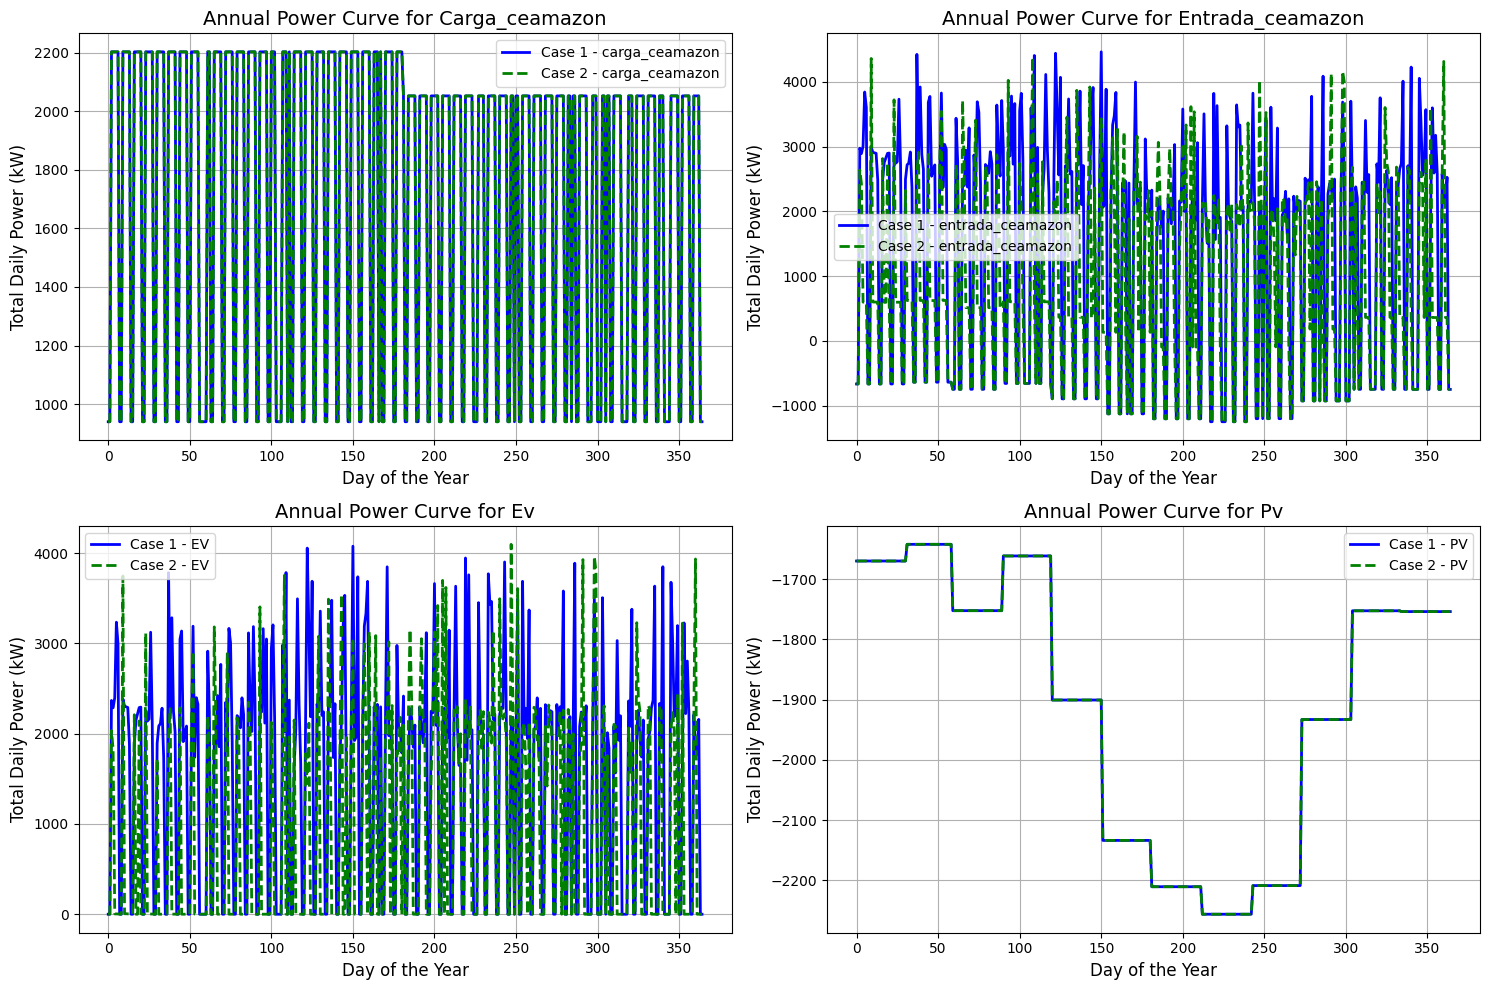

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV para os dois casos
arquivos_csv_caso1 = {
    'carga_ceamazon': 'potencia_ano_carga_ceamazon_true_false.csv',
    'entrada_ceamazon': 'potencia_ano_entrada_ceamazon_true_false.csv',
    'EV': 'potencia_ano_ve_true_false.csv',
    'PV': 'potencia_ano_pv_true_false.csv'
}

arquivos_csv_caso2 = {
    'carga_ceamazon': 'potencia_ano_carga_ceamazon_true_true.csv',
    'entrada_ceamazon': 'potencia_ano_entrada_ceamazon_true_true.csv',
    'EV': 'potencia_ano_ve_true_true.csv',
    'PV': 'potencia_ano_pv_true_true.csv'
}

def plot_annual_power_comparison():
    plt.figure(figsize=(15, 10))

    for i, key in enumerate(arquivos_csv_caso1.keys(), 1):
        df_caso1 = pd.read_csv(arquivos_csv_caso1[key])
        df_caso2 = pd.read_csv(arquivos_csv_caso2[key])

        # Soma anual para cada caso
        annual_power_sum_caso1 = df_caso1.sum(axis=1)
        annual_power_sum_caso2 = df_caso2.sum(axis=1)

        plt.subplot(2, 2, i)
        plt.plot(annual_power_sum_caso1.index, annual_power_sum_caso1, label=f'Case 1 - {key}', color='blue', linewidth=2)
        plt.plot(annual_power_sum_caso2.index, annual_power_sum_caso2, label=f'Case 2 - {key}', color='green', linestyle='--', linewidth=2)
        plt.xlabel('Day of the Year', fontsize=12)
        plt.ylabel('Total Daily Power (kW)', fontsize=12)
        plt.title(f'Annual Power Curve for {key.capitalize()}', fontsize=14)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.savefig('annual_power_comparison.png')
    plt.show()

# Chamada da função para plotar as curvas anuais
plot_annual_power_comparison()


KeyError: 'Potencia'

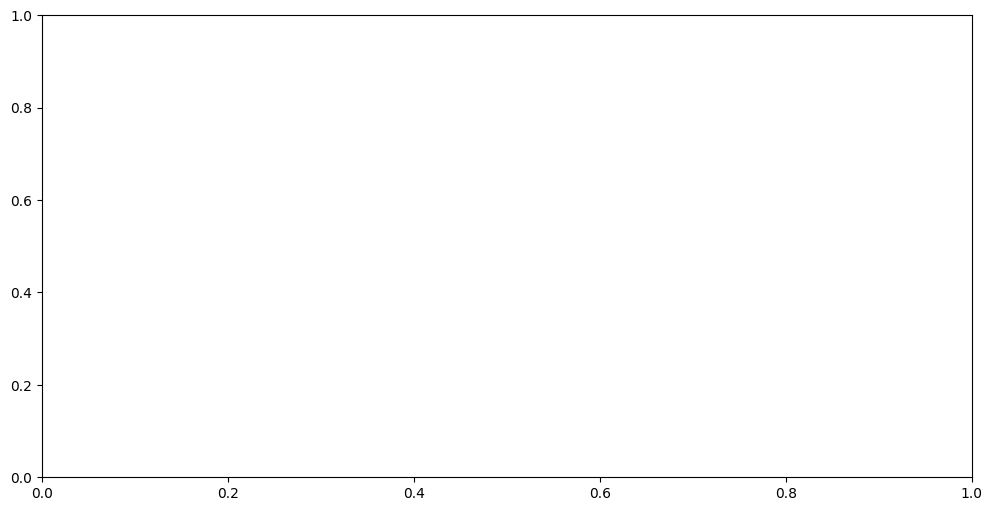

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Função para plotar a curva de potência diária para os veículos elétricos
def plot_daily_power_curve_for_ve(day, case1_path, case2_path, output_path):
    # Carregando os dados dos dois cenários para VE
    df_case1 = pd.read_csv(case1_path)
    df_case2 = pd.read_csv(case2_path)

    # Selecionando os dados para o dia específico
    daily_data_case1 = df_case1.iloc[(day-1)*144:day*144].reset_index(drop=True)
    daily_data_case2 = df_case2.iloc[(day-1)*144:day*144].reset_index(drop=True)

    # Criando a figura e o eixo
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotando os dados para o caso 1 e caso 2
    ax.plot(daily_data_case1['Potencia'], label='Case 1 - VE Power', color='blue')
    ax.plot(daily_data_case2['Potencia'], label='Case 2 - VE Power', color='orange')

    # Configurando o formato da data no eixo x
    hours = mdates.HourLocator(interval=1)
    h_fmt = mdates.DateFormatter('%Hh%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)

    # Adicionando títulos e rótulos
    plt.title(f'VE Power Curve for Day {day}')
    plt.xlabel('Time of Day')
    plt.ylabel('Power (kW)')

    # Adicionando a legenda
    plt.legend()

    # Salvando a figura
    plt.savefig(output_path, format='svg')
    plt.close(fig)

    return output_path

# Função para plotar a curva de potência para um intervalo de tempo específico para VE
def plot_power_curve_range_for_ve(start_date, end_date, case1_path, case2_path, output_path):
    # Carregando os dados dos dois cenários para VE
    df_case1 = pd.read_csv(case1_path)
    df_case2 = pd.read_csv(case2_path)

    # Convertendo as datas em índices de linha
    start_day = pd.to_datetime(start_date, format='%d/%m').day_of_year
    end_day = pd.to_datetime(end_date, format='%d/%m').day_of_year

    # Selecionando os dados para o intervalo de tempo
    range_data_case1 = df_case1.iloc[(start_day-1)*144:end_day*144].reset_index(drop=True)
    range_data_case2 = df_case2.iloc[(start_day-1)*144:end_day*144].reset_index(drop=True)

    # Criando a figura e o eixo
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotando os dados para o caso 1 e caso 2
    ax.plot(range_data_case1['Potencia'], label='Case 1 - EV Power', color='blue')
    ax.plot(range_data_case2['Potencia'], label='Case 2 - EV Power', color='orange')

    # Configurando o formato da data no eixo x
    days = mdates.DayLocator()
    d_fmt = mdates.DateFormatter('%j')
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)

    # Adicionando títulos e rótulos
    plt.title('EV Power Curve over Time Range')
    plt.xlabel('Day of the Year')
    plt.ylabel('Power (kW)')

    # Adicionando a legenda
    plt.legend()

    # Salvando a figura
    plt.savefig(output_path, format='svg')
    plt.close(fig)

    return output_path

# Caminhos dos arquivos CSV (os caminhos são hipotéticos, substituir pelos caminhos reais no sistema de arquivos)
case1_csv_path = 'potencia_ano_ve_true_false.csv'
case2_csv_path = 'potencia_ano_ve_true_true.csv'

# Chama as funções de plotagem e salvamento dos gráficos
output_daily_path = plot_daily_power_curve_for_ve(
    day=3,
    case1_path=case1_csv_path,
    case2_path=case2_csv_path,
    output_path='/mnt/data/daily_ve_power_curve.svg'
)

output_range_path = plot_power_curve_range_for_ve(
    start_date='01/01',
    end_date='31/01',
    case1_path=case1_csv_path,
    case2_path=case2_csv_path,
    output_path='/mnt/data/range_ve_power_curve.svg'
)

